In [1]:
"""
input = numpy random matrix A + i*(numpy random matrix B)
output = 0 or 1 0 if real, 1 if imaginary

build a preceptron classifier to distinguish between real and random numbers

"""

'\ninput = numpy random matrix A + i*(numpy random matrix B)\noutput = 0 or 1 0 if real, 1 if imaginary\n\nbuild a preceptron classifier to distinguish between real and random numbers\n\n'

[0.2863894921194816, 0.3595919984373419, 0.18830977316557468, 0.4896763512345939, 0.030689521179719015, 0.1431947460597408, 0.17979599921867095, 0.09415488658278734, 0.24483817561729695, 0.015344760589859507]
tensor([0.5811, 0.4183, 0.5254, 0.5464, 0.2744], grad_fn=<ThAddBackward>)


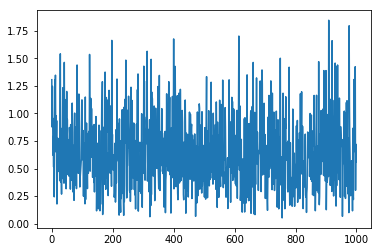

In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt

network = torch.nn.Sequential(
    torch.nn.Linear(5,4),
    torch.nn.Sigmoid(),
    torch.nn.Linear(4,2),
    torch.nn.Sigmoid(),
    torch.nn.Linear(2,5)
)

loss_fn = torch.nn.MSELoss(reduction='sum')
learning_rate = 0.2

def checker(mat):
    res = []
    for i in mat:
        if i<0.1:
            res.append(0)
        else:
            res.append(i)
    return torch.Tensor(res)

loss_vals = []

for _ in range(1000):
    mat_real = np.random.rand(5)
    mat_real = [i/2 for i in mat_real]
    inp_real = torch.Tensor(mat_real)
    
    mat_img = np.random.rand(5)
    mat_img = [i/2 for i in mat_real]
    inp_img = torch.Tensor(mat_real)

    desired_out_real = checker(inp_real)
    desired_out_img = checker(inp_img)
    
    pred = network(inp_real+inp_img)
    loss = loss_fn(pred,desired_out_real+desired_out_img)
    loss_vals.append(loss)
    network.zero_grad()
    loss.backward()
    
    with torch.no_grad():
        for param in network.parameters():
            param -= learning_rate * param.grad

for _ in range(1000):
    mat_real = np.random.rand(5)
    mat_real = [i/2 for i in mat_real]
    inp_real = torch.Tensor(mat_real)
    
    mat_img = np.random.rand(5)
    mat_img = [i/2 for i in mat_real]
    inp_img = torch.Tensor(mat_real)
    
    pred = network(inp_real+inp_img)
    print(mat_real+mat_img)
    print(pred)
    break

plt.plot([i for i in range(len(loss_vals))],loss_vals)
plt.show()